 TP  3 : Les villes de France
 =====

1 - Introduction 
------


L'objectif de ce TP est d'aller plus loin dans l'utilisation de numpy en réalisant un programme qui permette de calculer des distances entre villes. 

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N hésite pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html

**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

In [28]:
import numpy as np
import scipy as sc
import scipy.misc
import matplotlib.pyplot as plt

2 - Découverte de fonction numpy de calcul de distance
----

### 2.1 - Création de points

Créez un vecteur `x` de 10 valeurs entre 0 et $2\pi$. 

In [29]:
x = np.linspace(0, 2*np.pi, 10);
print(x)

[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]


Concaténez les vecteurs $cos(x)$ et $sin(x)$ pour former un tableau `p` de taille (10,2).

In [30]:
p = np.stack((np.cos(x), np.sin(x)), axis=1)
print(p.shape)

(10, 2)


In [31]:
print(p.shape==(10,2))

True


Affichez les 10 points que nous venons de créer avec la fonction `plt.scatter`. Vous pouvez ajouter `plt.axis('equal')` pour avoir des axes orthonormaux.

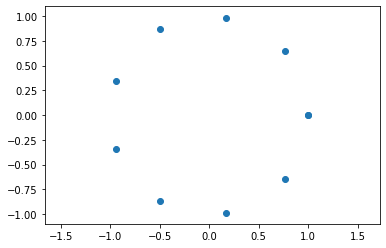

In [32]:
plt.scatter(p[:,0],p[:,1])
plt.axis('equal')
plt.show()

### 2.2 Calcul de distances entre points

La fonction `sc.spatial.distance.pdist` de la librairie *scipy* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) permet de calculer toutes les distances (par défaut la distance euclidienne) entre les points d'un ensemble de point. Elle retourne ainsi un vecteur qui correspond d'abord à la distance du premier point avec tous les autres, puis la distance du deuxième point avec tous les autres sauf le premier point (en effet la distance entre le deuxième point et le premier est déjà calculée lorsque l'on a calculé la distance entre le premier point et le deuxième)...
Cette fonction est optimisée pour calculer chaque distance une seule fois. 
Utilisez là pour calculer les distances des points `p`. Vous stockerez le résultat dans `md`.

In [33]:
md = sc.spatial.distance.pdist(p)
print(md)

AttributeError: module 'scipy' has no attribute 'spatial'

### 2.3 Calcul de la matrice des distances entre les points

Dans cette partie, nous voulons construire une matrice permettant de retrouver facilement la distance entre chaque point. Une case $i,j$ de cette matrice, représente la distance entre le point $i$ et le point $j$.

Créez un vecteur `v` des entiers compris ente 0 et 10.

In [35]:
v = np.arange(0, 10)
print(v)

[0 1 2 3 4 5 6 7 8 9]


Créez une matrice `m` contenant le vecteur `v` répété sur 10 lignes.

In [36]:
m = np.tile(v, (10,1))
print(m)
print(m.shape)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
(10, 10)


Créez un tableau `t` de dimension (10,10,2) contenant une concaténation de la matrice $m$ et de sa transposée.

In [ ]:
t = np.stack((m, m.T), axis=2)
print(t.shape)
print(t)

Lancez le code suivant, vous devriez avoir une matrice triangulaire supérieur. La visualisation de la matrice sous forme d'image peut être plus clair qu'un affichage direct de ses valeurs.

In [ ]:
masque = 1*(t[:,:,0]>t[:,:,1])
print(masque)
plt.imshow(masque,cmap='gray')
plt.title('Matrice masque')
# Affichage de la grille
ax = plt.gca()
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 10))
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
ax.set_xticklabels(np.arange(10))
ax.set_yticklabels(np.arange(10))
plt.grid(which='minor')
plt.show()

Nous voulons créez une matrice permettant de connaitre les distances entre les 10 points étudiés. Une case $i,j$ représente la distance entre le point $i$ et le point $j$. Commencez par créer une matrice `dist` de (10,10) que vous initialiserez à 0.

In [ ]:
dist = np.zeros(np.array((10,10)))
print(dist.shape)

plt.figure(figsize = (10,8))
plt.imshow(dist,cmap='gray')
plt.title('Matrice masque')
# Affichage de la grille
ax = plt.gca()
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 10))
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
ax.set_xticklabels(np.arange(10))
ax.set_yticklabels(np.arange(10))
plt.grid(which='minor')
plt.show()

La matrice `masque` calculée précédemment indique entre quels points sont calculés les distances du vecteur `md` (calculé par la fonction `sc.spatial.distance.pdist`). Les 1 de la matrice `masque` sont les endroits où devront être recopié les valeurs du vecteur `md`. L'ordre de parcourir correspond à l'ordre de parcours normal sur les tableaux numpy. 

Recopiez les valeurs de `md` dans `dist` aux positions où le `masque==1`.

In [ ]:
dist[masque == 1] = md
print(dist.shape)

plt.figure(figsize = (6,6))
plt.imshow(dist,cmap='gray')
plt.title('Matrice masque')
# Affichage de la grille
ax = plt.gca()
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 10))
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
ax.set_xticklabels(np.arange(10))
ax.set_yticklabels(np.arange(10))
plt.grid(which='minor')
plt.show()

Il faut maintenant compléter la matrice avec son symétrique pour avoir la matrice de toutes les distances. La diagonale peut être laissé à 0 (la distance d'un point avec lui même est bien nulle).

In [ ]:
symetric = dist + dist.T

print(symetric.shape)

plt.figure(figsize = (8,8))
plt.imshow(symetric,cmap='gray')
plt.title('Matrice masque')
# Affichage de la grille
ax = plt.gca()
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 10))
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
ax.set_xticklabels(np.arange(10))
ax.set_yticklabels(np.arange(10))
plt.grid(which='minor')
plt.show()

Vous pouvez vérifiez la distance entre le premier et le cinquième point.

In [ ]:
print(dist[0,5])
print(dist[0,5:][0])


L'opération que nous venons de faire peut être faite directement avec la fonction `sc.spatial.distance.squareform` de scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform). Utilisez cette fonction sur `md` et comparez le résultat avec la matrice `dist`.

In [ ]:
print('Egalite des deux solutions ? : ', ((sc.spatial.distance.squareform(md) == dist).all()))

3 - Analyse du fichier fourni
---

Nous allons travailler dans ce TP sur une version modifiée d'un fichier recensant l'ensemble des villes de France dont la version originale se trouve à l'adresse suivante: https://www.data.gouv.fr/fr/datasets/listes-des-communes-geolocalisees-par-regions-departements-circonscriptions-nd/.
Vous avez à votre disposition  deux fichiers appelé *villes\_france.csv* et *villes\_normandie.csv* contenant des informations sur respectivement l'ensemble des villes de France et de Normandie. Vous pouvez commencer à regarder leurs contenus au moyen d'un éditeur de texte (par exemple gedit), ou l'importer sous Open Office ou Libre Office. Vous verrez que la première ligne contient les intitulés des colonnes. Les colonnes sont séparées par des ";".  

Vous travaillerez dans un premier sur le fichier *villes\_normandie.csv*. Une fois votre code fonctionnel, vous pouvez tester sur l'ensemble des villes de France *villes\_france.csv*.

Le code suivant importe le contenu du fichier *villes\_normandie.csv* dans la variable `nom_ville`. Seule la colonne 8 est importé, chaque colonne étant défini grâce au séparateur `;`.

In [ ]:
nom_ville = np.loadtxt('villes_normandie.csv', delimiter=';',dtype=np.string_,usecols=8,skiprows=1)
print(nom_ville)

Le code suivant permet de détecter les villes portant le même nom. Nous les supprimerons dans la suite du TP. La variable `premier_doublon` indique l'indice de chaque première occurrence de nom des villes.

In [ ]:
# Détection des doublons
nom_ville, premier_doublon = np.unique(nom_ville, return_index=True)
print(nom_ville)

Les villes présentent dans le tableau précédant sont stockées sous la forme de chaines de caractère numpy (ce qui explique le b devant les ''). Pour afficher correctement la 428 ème ville, vous pouvez utiliser le code suivant: 

In [ ]:
print(nom_ville[428].decode('latin_1'))

En utilisant le tableau précédent et une boucle `for` et `if`, créez un dictionnaire python nommé `ville` donnant pour un nom de ville son numéro correspondant à son ordre d'apparition dans le tableau `nom_ville`. Par exemple *Ablon* aura le numéro 0, *Caen* le numéro 428... Vous convertirez les chaines de caractères numpy en chaine de caractères python comme dans l'affichage ci-dessus.

In [ ]:
ville = {}
for i in range(len(nom_ville)):
    ville[nom_ville[i]] = i


In [ ]:
print('Verification Audrieu:',nom_ville[ville['Audrieu']]==b'Audrieu')
print('Verification Caen:',nom_ville[ville['Caen']]==b'Caen')

Créez une matrice numpy `coord` dans laquelle chaque ligne représente une ville, la première colonne contient la latitude et la seconde colonne la longitude de la ville. Pour cela remplacez dans le code suivant les "?" avec les bonnes valeurs. Vous aurez besoin d'ouvrir le fichier *villes_normandie.csv* avec un éditeur de texte pour connaitre les indices des colonnes à récupérer.

In [ ]:
coord = np.loadtxt('villes_normandie.csv', delimiter=';',usecols=(11,12),skiprows=1)
coord = coord[premier_doublon]

In [ ]:
print('Verification des coordonnees de Caen:',np.prod(coord[ville['Caen']]==[49.183333,-0.35 ])==1)

Sauver le dictionnaire et les matrices dans un fichier de type "pickle", cela sera plus facile à charger ultérieurement. 

In [ ]:
import pickle

# pour écrire les données sur disque avec pickle
with open('data.pickle', 'wb') as f:  
    pickle.dump([ville,nom_ville,coord], f)
    
# pour lire les données sur disque avec pickle
with open('data.pickle', 'rb') as f:  
    [ville,nom_ville,coord] = pickle.load(f)

4 - Distances géodésiques entre villes
----

Dans un premier temps, vous écrirez une fonction `distGeo` qui permet de calculer la distance géodésique entre deux villes, à partir des coordonnées des villes. Vous utiliserez pour cela l'équation suivante :

$$
	d_g = R \cos^{-1}\left(\sin(p1_{lat})\sin(p2_{lat})+\cos(p1_{lat})\cos(p2_{lat})\cos(p1_{lon}-p2_{lon})\right)
$$
où $R=6367.445$ est le rayon de la terre (en km), $p1$ et $p2$ les deux points dont on souhaite calculer la distance. Les indices $_{lat}$ $_{lon}$ représentent la latitude et la longitude en radian. Attention, dans le ficher de données, les valeurs sont données en degrés.


In [ ]:
R = 6367.445

def distGeo(u,v):
    u = u*np.pi/180
    v = v*np.pi/180
    
    return R*np.arccos(np.sin(u[0])*np.sin(v[0]) + np.cos(u[0])*np.cos(v[0])*np.cos(u[1] - v[1]))

In [ ]:
print ('Verification la distance géodesique entre Caen et Audrieu:',distGeo(coord[ville["Caen"]],coord[ville["Audrieu"]])==18.25141017851904)

Vérifiez que votre fonction donne un résultat correct en calculant la distance entre Caen et Rouen et comparez le  résultat à celui donné par le site https://www.ephemeride.com/atlas/distance/27/ qui permet de calculer les distances à vol d'oiseau entre deux villes.

In [ ]:
print("Distance entre Caen et Rouen: ", distGeo(coord[ville["Caen"]], coord[ville["Rouen"]]))

Nous désirons désormais calculer une matrice `dist` contenant l'ensemble des distances entre villes. La valeur $(i,j)$ de cette matrice représentera la distance entre la ville $i$ et la ville $j$.
 
Construire cette matrice avec des boucles prendrait beaucoup trop de temps. Utilisez les fonctions `pdist` et `squareform` vu en début de TP. Nous attirons votre attention sur l'argument `metric` de la fonction `pdist` permettant de choisir le type de distance utilisée. Cet argument peut être soit une chaîne de caractère parmi celles proposées dans la documentation, soit une fonction que vous avez préalablement créée.

**Calculez cette matrice de distance pour les 500 premières villes (matrice 500x500).** 
Affichez également le temps d'exécution de ce bloc d'instruction.

In [ ]:
%%time
m = sc.spatial.distance.pdist(coord[0:500,:], distGeo)
dist = sc.spatial.distance.squareform(m)

In [ ]:
print('Distance ente Caen et Audrieu:',dist[ville['Caen'],ville['Audrieu']]==18.25141017851904)

À votre avis que va-t-il se passer si on veut calculer cette matrice pour l'ensemble des villes de Normandie ?

In [ ]:
%%time
m_normandie = sc.spatial.distance.pdist(coord, distGeo)
dist_normandie = sc.spatial.distance.squareform(m_normandie)